##  Load the dataset

In [1]:
import pandas as pd
import numpy as np

In [3]:
#loaded our dataset
# Load the dataset
import pandas as pd

df = pd.read_csv('/home/laaria/Desktop/REPOSITORIES/PRACTICE-NOTEBOOKS/DATA/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


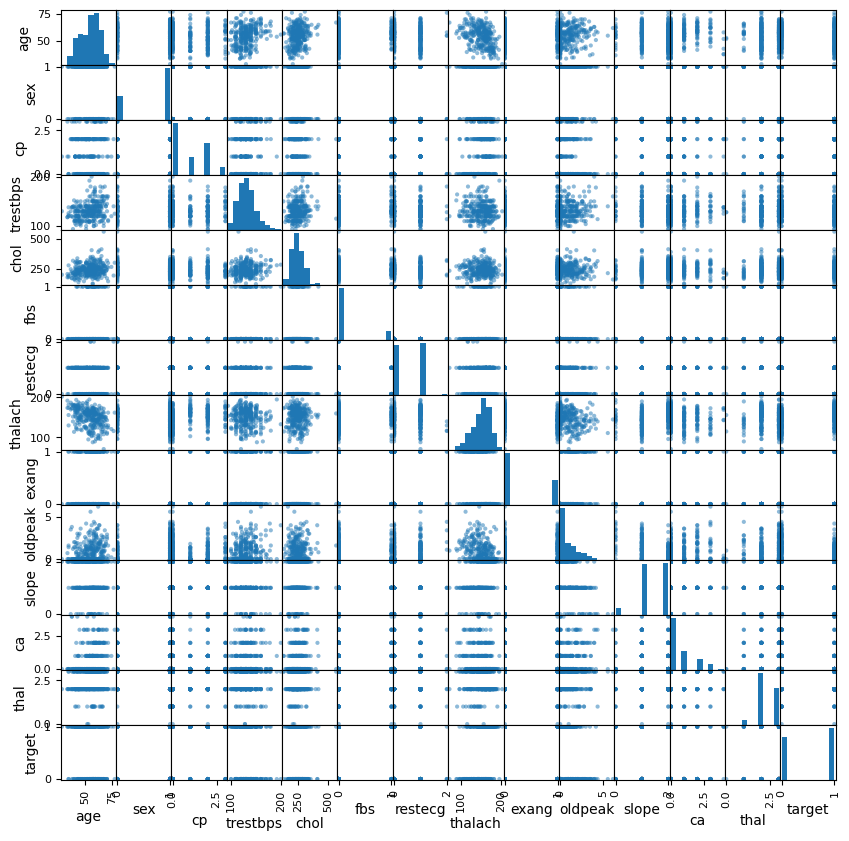

In [5]:
# Optional but always recommended; briefly explore your dataset
pd.plotting.scatter_matrix(df, figsize=(10,10)); 

In [6]:
# Optional but always recommended; briefly explore your dataset
df['target'].value_counts() 

target
1    165
0    138
Name: count, dtype: int64

##  Define the problem

The dataset contains various patient measurements along with a 'target' variable indicating whether or not the individual has heart disease. Define X and y below:

In [8]:
#preview
# Your code here
X = df[[col for col in df.columns if col != 'target']]
y = df['target']

Modelling

In [9]:
# Splitting our data into a training set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

## Calculate the mean & standard deviation of each feature for each class in the training set

Now, calculate the mean and standard deviation for each feature within each of the target class groups. This will serve as your a priori distribution estimate to determine the posterior likelihood of an observation belonging to one class versus the other.

In [10]:
# Calculate the mean and standard deviation for each feature within each class for the training set
train = pd.concat([X_train, y_train], axis=1)
aggs = train.groupby('target').agg(['mean', 'std'])
aggs

age                 sex                  cp            \
             mean       std      mean       std      mean       std   
target                                                                
0       57.281553  8.009085  0.796117  0.404853  0.466019  0.916253   
1       52.322581  9.995567  0.564516  0.497832  1.427419  0.972578   

          trestbps                   chol             ...     exang            \
              mean        std        mean        std  ...      mean       std   
target                                                ...                       
0       134.067961  18.919469  251.543689  52.341596  ...  0.543689  0.500523   
1       129.137097  16.589415  240.516129  46.683240  ...  0.161290  0.369291   

         oldpeak               slope                  ca                thal  \
            mean       std      mean       std      mean       std      mean   
target                                                                         
0       1.600971  1.310253  1.184466  0.555676  1.213592  1.025656  2.582524   
1       0.592742  0.749544  1.580645  0.612827  0.354839  0.818422  2.072581   

                  
             std  
target            
0       0.602678  
1       0.444906  

[2 rows x 26 columns]

## Define a function to calculate the point estimate for the conditional probability of a feature value for a given class

In [11]:
# Your code here
from scipy import stats
def p_x_given_class(obs_row, feature, class_):
    mu = aggs[feature]['mean'][class_]
    std = aggs[feature]['std'][class_]
    
    # Observation
    obs = obs_row[feature] 
    
    p_x_given_y = stats.norm.pdf(obs, loc=mu, scale=std)
    return p_x_given_y
p_x_given_class(X_train.iloc[0], X.columns[0], 0)

0.035036938123834606

## Define a prediction function¶

Define a prediction function that will return a predicted class value for a particular observation. To do this, calculate the point estimates for each of the features using your function above. Then, take the product of these point estimates for a given class and multiply it by the probability of that particular class. Take the class associated with the largest probability output from these calculations as your prediction.

In [12]:
# Your code here
import numpy as np
def predict_class(obs_row):
    c_probs = []
    for c in range(2):
        # Initialize probability to relative probability of class
        p = len(y_train[y_train == c])/len(y_train) 
        for feature in X.columns:
            p *= p_x_given_class(obs_row, feature, c)
        c_probs.append(p)
    return np.argmax(c_probs)

In [14]:
predict_class(X_train.iloc[0])

0

## Apply your prediction function to the training and test sets

In [15]:
# Your code here
y_hat_train = [predict_class(X_train.iloc[idx]) for idx in range(len(X_train))]
y_hat_test = [predict_class(X_test.iloc[idx]) for idx in range(len(X_test))]

## Calculate the training and test accuracy

In [16]:
# Your code here
residuals_train = y_hat_train == y_train
acc_train = residuals_train.sum()/len(residuals_train)

residuals_test = y_hat_test == y_test
acc_test = residuals_test.sum()/len(residuals_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(acc_train, acc_test))

Training Accuracy: 0.8502202643171806	Testing Accuracy: 0.8289473684210527
